In [620]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression

In [621]:
# Load all dimensionless data
dimensionless_camels = pd.read_csv('data/Non-dimensionalized_data_camels.csv')
dimensionless_dogs = pd.read_csv('data/Non-dimensionalized_data_dogs.csv')
dimensionless_elephants = pd.read_csv('data/Non-dimensionalized_data_elephants.csv')
dimensionless_humans = pd.read_csv('data/Non-dimensionalized_data_humans.csv')
dimensionless_ostriches = pd.read_csv('data/Non-dimensionalized_data_ostriches.csv')
dimensionless_rhinos = pd.read_csv('data/Non-dimensionalized_data_rhinos.csv')
dimensionless_sheep = pd.read_csv('data/Non-dimensionalized_data_sheep.csv')

In [622]:
# Load all dimension data
dimension_camels = pd.read_csv('data/Dimensionalized_data_camels.csv')
dimension_dogs = pd.read_csv('data/Dimensionalized_data_dogs.csv')
dimension_humans = pd.read_csv('data/Dimensionalized_data_humans.csv')

In [623]:
# Update column names
dimensionless_camels.columns = ['Dimensionless speed', 'Relative stride length']
dimensionless_dogs.columns = ['Dimensionless speed', 'Relative stride length']
dimensionless_elephants.columns = ['Dimensionless speed', 'Relative stride length']
dimensionless_humans.columns = ['Dimensionless speed', 'Relative stride length']
dimensionless_ostriches.columns = ['Dimensionless speed', 'Relative stride length']
dimensionless_rhinos.columns = ['Dimensionless speed', 'Relative stride length']
dimensionless_sheep.columns = ['Dimensionless speed', 'Relative stride length']

# Update column names
dimension_dogs.columns = ['Speed, m/s', 'Stride length, m']
dimension_camels.columns = ['Speed, m/s', 'Stride length, m']
dimension_humans.columns = ['Speed, m/s', 'Stride length, m']

In [624]:
# Info on column names
print(dimension_humans.columns)
print(dimensionless_camels.columns)

Index(['Speed, m/s', 'Stride length, m'], dtype='object')
Index(['Dimensionless speed', 'Relative stride length'], dtype='object')


In [625]:
# Modify Froude number values by squaring them
dimensionless_camels['Dimensionless speed'] = dimensionless_camels['Dimensionless speed'] ** 2
dimensionless_dogs['Dimensionless speed'] = dimensionless_dogs['Dimensionless speed'] ** 2
dimensionless_elephants['Dimensionless speed'] = dimensionless_elephants['Dimensionless speed'] ** 2
dimensionless_humans['Dimensionless speed'] = dimensionless_humans['Dimensionless speed'] ** 2
dimensionless_ostriches['Dimensionless speed'] = dimensionless_ostriches['Dimensionless speed'] ** 2
dimensionless_rhinos['Dimensionless speed'] = dimensionless_rhinos['Dimensionless speed'] ** 2
dimensionless_sheep['Dimensionless speed'] = dimensionless_sheep['Dimensionless speed'] ** 2

In [626]:
# Plot layout
#Change font type and font size in axis labels
matplotlib.rcParams.update({'legend.markerscale': 1.5, 'legend.handlelength': 1, 'legend.frameon': 1, 'legend.handletextpad': 1 , 'font.size': 18,'font.family':'Times New Roman'})

matplotlib.rcParams['text.usetex'] = True

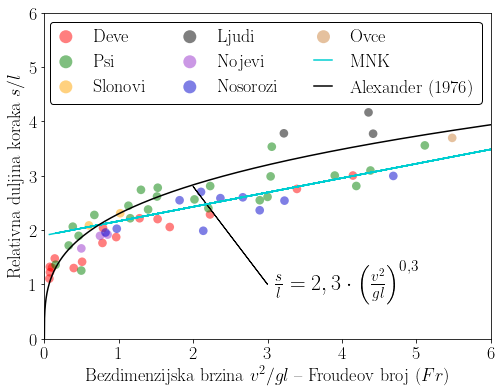

In [627]:
# Plot dimensionless velocity vs dimensionless stride length data
fig = plt.figure(figsize=(8,6))

plt.scatter(dimensionless_camels['Dimensionless speed'],dimensionless_camels['Relative stride length'],color='red',s=75,label='Deve',alpha=0.5,edgecolors='none')
plt.scatter(dimensionless_dogs['Dimensionless speed'],dimensionless_dogs['Relative stride length'],color='green',s=75,label='Psi',alpha=0.5,edgecolors='none')
plt.scatter(dimensionless_elephants['Dimensionless speed'],dimensionless_elephants['Relative stride length'],color='orange',s=75,label='Slonovi',alpha=0.5,edgecolors='none')
plt.scatter(dimensionless_humans['Dimensionless speed'],dimensionless_humans['Relative stride length'],color='black',s=75,label='Ljudi',alpha=0.5,edgecolors='none')
plt.scatter(dimensionless_ostriches['Dimensionless speed'],dimensionless_ostriches['Relative stride length'],color='darkorchid',s=75,label='Nojevi',alpha=0.5,edgecolors='none')
plt.scatter(dimensionless_rhinos['Dimensionless speed'],dimensionless_rhinos['Relative stride length'],color='mediumblue',s=75,label='Nosorozi',alpha=0.5,edgecolors='none')
plt.scatter(dimensionless_sheep['Dimensionless speed'],dimensionless_sheep['Relative stride length'],color='peru',s=75,label='Ovce',alpha=0.5,edgecolors='none')

plt.xlabel('Bezdimenzijska brzina $v^2/gl$ – Froudeov broj ($Fr$)')
plt.ylabel('Relativna duljina koraka $s/l$')

plt.xlim((0,6))
plt.ylim((0,6))

# Combine data into one dataframe
data = pd.concat([dimensionless_camels,dimensionless_dogs,dimensionless_elephants,dimensionless_humans,dimensionless_ostriches,dimensionless_rhinos,dimensionless_sheep],axis=0).reset_index(drop=True)

# Linear regression model
lgr = LinearRegression()
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr.fit(X,Y)
data_predict = lgr.predict(X)

plt.plot(X, data_predict, color='darkturquoise',label='MNK')

# Equation derived by Alexander (1976)
Fr = np.linspace(0,6,10000)
rel_stride_length = 2.3 * (Fr ** 0.3)

plt.plot(Fr,rel_stride_length,color='black',label='Alexander (1976)')
plt.text(3.1, 0.9, r'$\frac{s}{l} = 2,3 \cdot \left(\frac{v^2}{gl} \right)^{0,3}$',fontsize=22,color='black')
plt.arrow(3,1,-1,1.8,shape='full')

plt.legend(loc=1,framealpha=1,edgecolor='black',ncol=3)
plt.savefig('bezdimenzijska_brzina.pdf',bbox_inches='tight')

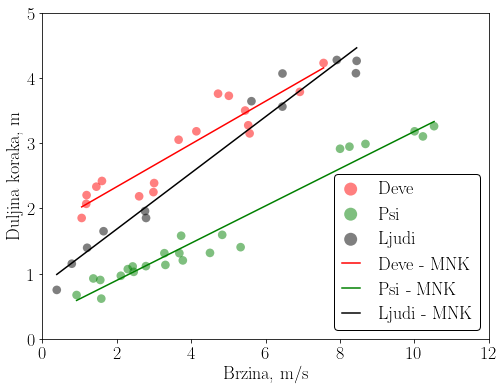

In [628]:
# Plot velocity vs stride length data
fig = plt.figure(figsize=(8,6))

plt.scatter(dimension_camels['Speed, m/s'],dimension_camels['Stride length, m'],color='red',s=75,label='Deve',alpha=0.5,edgecolors='none')
plt.scatter(dimension_dogs['Speed, m/s'],dimension_dogs['Stride length, m'],color='green',s=75,label='Psi',alpha=0.5,edgecolors='none')
plt.scatter(dimension_humans['Speed, m/s'],dimension_humans['Stride length, m'],color='black',s=75,label='Ljudi',alpha=0.5,edgecolors='none')

plt.xlabel('Brzina, m/s')
plt.ylabel('Duljina koraka, m')

plt.xlim((0,12))
plt.ylim((0,5))

# Linear regression model
lgr_camels = LinearRegression()
X = dimension_camels.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dimension_camels.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr_camels.fit(X,Y)
camels_predict = lgr_camels.predict(X)

plt.plot(X, camels_predict, color='red',label='Deve - MNK')

lgr_dogs = LinearRegression()
X = dimension_dogs.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dimension_dogs.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr_dogs.fit(X,Y)
dogs_predict = lgr_dogs.predict(X)

plt.plot(X, dogs_predict, color='green',label='Psi - MNK')

lgr_humans = LinearRegression()
X = dimension_humans.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dimension_humans.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr_humans.fit(X,Y)
humans_predict = lgr_humans.predict(X)

plt.plot(X, humans_predict, color='black',label='Ljudi - MNK')

plt.legend(loc=4,framealpha=1,edgecolor='black')
plt.savefig('dimenzijska_brzina.pdf',bbox_inches='tight')